<a href="https://colab.research.google.com/github/mc-juan-vargas-2024/cuadernos-y-proyectos-ia/blob/main/Fundamento_Cuaderno_6_Selecci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Cuaderno 6: Selección de Características
La selección de características es una técnica fundamental en el preprocesamiento de datos que busca identificar las características más relevantes para un modelo de machine learning. Este proceso tiene como objetivo reducir la complejidad del modelo, mejorar su interpretabilidad, evitar el sobreajuste y reducir los tiempos de entrenamiento. En esta sesión, exploraremos diversos métodos de selección de características, desde enfoques estadísticos hasta técnicas automáticas y basadas en regularización.


---
## <font color="red">6.1 ¿Qué es la Selección de Características?
La selección de características es el proceso de elegir un subconjunto de las variables originales del dataset que sea más relevante para el problema que se quiere resolver. Al reducir el número de características, se mejora la eficiencia del modelo y se facilita su interpretación. Además, se puede evitar el sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos.
### Importancia de la selección de características:
* Mejora la precisión y la generalización del modelo.
* Reduce la complejidad computacional.
* Elimina la redundancia en los datos.
* Facilita la interpretación del modelo.


---
## <font color="red">6.2 Métodos de Selección Basados en Estadística
Existen varios métodos estadísticos que ayudan a seleccionar las características más relevantes. Algunos de los más comunes son:
### <font color="blue">6.2.1 Selección de Baja Varianza
Las características con muy baja varianza aportan poca información al modelo, ya que no varían significativamente entre las observaciones. Por lo tanto, estas características pueden ser eliminadas.



In [ ]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Datos de ejemplo
X = [[10, 80, 160], [10, 40, 165], [10, 70, 170], [12, 90, 180], [10, 30, 190]]
X=pd.DataFrame(X, columns=["Edad","Peso","Altura"])
X

X.var()

,0
Edad,0.8
Peso,670.0
Altura,145.0


In [ ]:
# Eliminar características con baja varianza (por defecto, umbral de 01
selector = VarianceThreshold(threshold=2)
X_new = selector.fit_transform(X)

In [ ]:
print(selector.get_support())


[False  True  True]


In [ ]:
print(selector.feature_names_in_)

['Edad' 'Peso' 'Altura']


In [ ]:
print(selector.get_feature_names_out())

['Peso' 'Altura']


In [ ]:

print("Características seleccionadas:\n", pd.DataFrame(X_new,columns=selector.get_feature_names_out()))

Características seleccionadas:
    Peso  Altura
0    80     160
1    40     165
2    70     170
3    90     180
4    30     190


### <font color="blue">6.2.2 Selección mediante Chi-cuadrado (Chi-Squared Test)
El test de Chi-cuadrado se utiliza para evaluar la independencia de una variable categórica respecto a las demás. Este test mide la diferencia entre la frecuencia observada y la esperada de las variables.


Este código realiza selección de características en un conjunto de datos, eligiendo las 10 mejores variables que tienen más relación con la variable objetivo (y) utilizando el test Chi-cuadrado.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Datos simulados
X = np.array([[5, 20, 30, 0, 1],
              [10, 15, 25, 1, 0],
              [7, 18, 27, 0, 1],
              [6, 21, 32, 1, 0],
              [9, 16, 29, 0, 1]])

y = np.array([1, 0, 1, 0, 1])  # Variable objetivo (compra o no)


In [ ]:
#Número columnas
X.shape[1]

5

In [ ]:
# Selección de las 3 mejores características (en este caso k=3)
selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X, y)

# Imprimir resultados
print("Características seleccionadas:", selector.get_support())
print("Nuevo conjunto de datos:")
print(X_new)


Características seleccionadas: [ True False False  True  True]
Nuevo conjunto de datos:
[[ 5  0  1]
 [10  1  0]
 [ 7  0  1]
 [ 6  1  0]
 [ 9  0  1]]


In [ ]:
X_new.shape[1]

3

### <font color="blue">6.2.3 Pruebas Estadísticas (ANOVA, T-Tests, etc.)
Otras pruebas estadísticas como el test ANOVA o el T-test pueden ser utilizadas para comparar las medias entre diferentes grupos y determinar si una característica tiene un impacto significativo sobre la variable objetivo. Este tipos de pruebas no serán cubiertos por este curso.


---

## <font color="red">6.3 Métodos Automáticos de Selección de Características
### <font color="blue">6.3.1 Selección Hacia Adelante (Forward Selection)
Este es un enfoque progresivo en el que comenzamos con un conjunto vacío de características y, en cada paso, añadimos la característica que mejora más el rendimiento del modelo.

Tanto Forward Selection como Backward Elimination son métodos de selección de características utilizados para reducir la dimensionalidad y mejorar el rendimiento de los modelos.

📌 Diferencia principal:

**Forward Selection:** Empieza con ninguna característica y va agregando las más relevantes.

**Backward Elimination:** Empieza con todas las características y va eliminando las menos importantes.


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits

# Datos de ejemplo
X, y = load_digits(return_X_y=True)

X.shape


(1797, 64)

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# Selección hacia adelante utilizando RFE
model = LinearRegression()
model.fit(X, y)
model.coef_

array([-5.75781288e-16,  8.57923376e-02, -1.00949621e-02, -2.83075186e-02,
        5.82128113e-02, -4.65962898e-03, -3.46872516e-02, -5.54517203e-03,
        1.17575413e+00, -2.72886589e-02,  1.03489006e-01,  4.39751669e-02,
       -6.55655744e-02, -7.42239599e-02,  8.77174597e-02,  2.37097336e-01,
       -9.21515850e-01,  2.09262966e-02,  7.90783605e-02, -3.13505587e-02,
       -6.74572273e-02,  4.84382828e-02, -5.51371084e-02, -2.58541429e-01,
       -8.99034170e-01, -1.57869617e-01,  3.73065417e-02,  8.46264203e-02,
        7.20498433e-02,  9.39294415e-02, -1.92571119e-02, -2.80099726e+00,
        2.52575738e-15, -1.57318573e-01, -2.05647288e-02,  1.35531204e-01,
       -4.56698698e-02,  3.50931490e-02, -1.03113414e-02, -1.11022302e-15,
        1.33616091e-01,  1.10960304e-01, -1.73050733e-02, -6.61512753e-03,
        1.12607142e-01,  5.58271849e-02,  9.23827312e-03,  9.82819205e-02,
        6.02436261e-01,  2.73519707e-02, -5.74530483e-03, -6.65091904e-02,
       -2.06505662e-01, -

In [ ]:
# Aplicar RFE para seleccionar las 5 mejores características
selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X, y)

In [ ]:
print("Características seleccionadas:\n", selector.support_)

Características seleccionadas:
 [False False False False False False False False  True False False False
 False False False  True  True False False False False False False False
  True False False False  True False False  True False False False False
 False False False False  True False False False False False False False
  True False False False  True False False False  True False False False
 False False False False]


In [ ]:
selector.get_feature_names_out()

array(['x8', 'x16', 'x24', 'x31', 'x56'], dtype=object)

In [ ]:
selector.get_params()

{'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'importance_getter': 'auto',
 'n_features_to_select': 5,
 'step': 1,
 'verbose': 0}

### <font color="blue">6.3.2 Selección Hacia Atrás (Backward Elimination)
En este enfoque, comenzamos con todas las características y, en cada paso, eliminamos la característica que tenga el menor impacto en el rendimiento del modelo.


In [ ]:
# Selección hacia atrás utilizando RFE
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

print("Características seleccionadas:\n", selector.support_)


Características seleccionadas: [False False False False False False  True False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False]


In [ ]:
selector.get_feature_names_out()

array(['x6', 'x22', 'x33', 'x38', 'x62'], dtype=object)

## <font color="red">6.4 Regularización para Selección de Características
La regularización es una técnica utilizada para reducir el sobreajuste en los modelos y puede ser aplicada para la selección de características. Se añaden penalizaciones a los coeficientes del modelo, lo que lleva a que algunas características sean eliminadas durante el entrenamiento.
### <font color="blue">6.4.1 Lasso (L1 Regularización)
El Lasso utiliza la penalización L1, que tiende a llevar los coeficientes de las características menos relevantes a cero, eliminándolas efectivamente del modelo.


Este código utiliza Lasso (L1 Regularization) para entrenar un modelo de regresión y analizar qué características son más importantes en la predicción.



In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Crear datos de ejemplo
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

# Ajustar el modelo Lasso
lasso = Lasso(alpha=0.1)  # La regularización controlada por alpha
lasso.fit(X, y)

print("Coeficientes seleccionados por Lasso:", lasso.coef_)


Coeficientes seleccionados por Lasso: [76.91794675 28.25497443 52.45792284 25.4999109  26.29010598  4.71361178
 82.16252971 73.08298537 33.09923363 53.99740392]


### <font color="blue">6.4.2 Ridge (L2 Regularización)
La regularización Ridge utiliza una penalización L2, que reduce la magnitud de los coeficientes pero no los lleva a cero. A pesar de no eliminar completamente las características, puede ser útil para manejar la multicolinealidad.


In [ ]:
from sklearn.linear_model import Ridge

# Ajustar el modelo Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)

print("Coeficientes seleccionados por Ridge:", ridge.coef_)


Coeficientes seleccionados por Ridge: [76.92693893 28.32436001 52.50482689 25.5868141  26.33958905  4.80431124
 82.19549854 73.11811076 33.18306639 54.03445227]


### <font color="blue">6.4.3 Elastic Net
Elastic Net es una combinación de Lasso y Ridge, que permite aprovechar las ventajas de ambos. Es útil cuando hay muchas características correlacionadas entre sí.


In [ ]:
from sklearn.linear_model import ElasticNet

# Ajustar el modelo Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # L1 y L2 combinados
elastic_net.fit(X, y)

print("Coeficientes seleccionados por Elastic Net:", elastic_net.coef_)


Coeficientes seleccionados por Elastic Net: [72.7671119  26.36532137 49.67712703 24.54886137 25.90891868  4.44147465
 78.83900107 68.88838301 31.68313296 51.23858562]


En este código  probamos diferentes valores de alpha para ver cómo Lasso selecciona características:

Alpha: 0.001
Coeficientes: [16.76375894 54.14161794  5.18126686 63.63603642 93.61567884 70.64107883
 87.07879233 10.44048626  3.1633866  70.90292524]
Número de coeficientes distintos de 0: 10
--------------------------------------------------
Alpha: 0.01
Coeficientes: [16.75350189 54.13404499  5.1666494  63.63004324 93.6023436  70.63725359
 87.06682312 10.42319969  3.15691617 70.89113928]
Número de coeficientes distintos de 0: 10
--------------------------------------------------
Alpha: 0.1
Coeficientes: [16.65093139 54.05831546  5.0204748  63.57011144 93.46899114 70.59900118
 86.94713107 10.25033395  3.09221178 70.77327962]
Número de coeficientes distintos de 0: 10
--------------------------------------------------
Alpha: 1
Coeficientes: [15.62522638 53.30102011  3.55872878 62.97079342 92.13546662 70.21647709
 85.75021056  8.52167658  2.44516794 69.59468307]
Número de coeficientes distintos de 0: 10
--------------------------------------------------
Alpha: 10
Coeficientes: [ 6.3327760

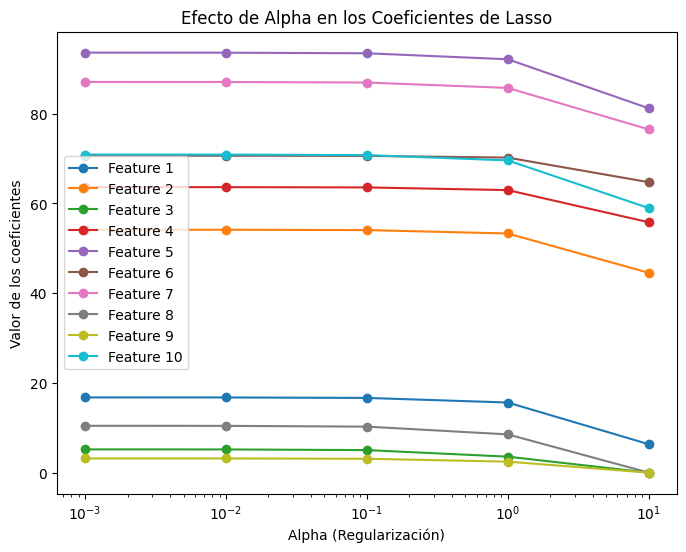

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Generar datos de ejemplo
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Valores de alpha a probar
alpha_values = [0.001, 0.01, 0.1, 1, 10]

# Guardar coeficientes para cada alpha
coef_matrix = []

# Entrenar Lasso con diferentes valores de alpha
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coef_matrix.append(lasso.coef_)
    print(f"Alpha: {alpha}")
    print("Coeficientes:", lasso.coef_)
    print("Número de coeficientes distintos de 0:", np.sum(lasso.coef_ != 0))
    print("-" * 50)

# Convertir la matriz de coeficientes a un array de NumPy
coef_matrix = np.array(coef_matrix)

# Graficar la evolución de los coeficientes con distintos valores de alpha
plt.figure(figsize=(8, 6))
for i in range(X.shape[1]):  # Iterar sobre cada característica
    plt.plot(alpha_values, coef_matrix[:, i], marker='o', label=f'Feature {i+1}')

plt.xscale("log")  # Escala logarítmica para alpha
plt.xlabel("Alpha (Regularización)")
plt.ylabel("Valor de los coeficientes")
plt.title("Efecto de Alpha en los Coeficientes de Lasso")
plt.legend(loc="best")
plt.show()
